# Week 9 Jupyter Notebook Assignment - Conceptualization
## Reviewing NLTK and introduction to Part of Speech Tagging

### This week's assignment is based on content originally developed for the Digital Humanities Research Institute <br> June 13, 2018 and previous work by former GC Digital Fellows, Michelle A. McSweeney, Ph.D. and Rachel Rakov, Ph.D. 

As we continue our discussion of conceptualization--connecting research questions and our data with what can be measured and counted--we will focus a bit on feature selection and tagging. In the authorship attribution exercises that we worked through, you can see how unique textual "signatures" that recur within an author's work are used to predict the likelihood that another document may also be authored by the person with the "textual signatures" most similar to the features in the anonymous document. 

In this week's notebook, we're going to review steps that we have performed several times now in previous assignments. At the end, we will use a new process, called Part of Speech tagging. We will draw on the POS tagger that comes with NLTK, and we will create a list of paired sets, called 'tuples'. In each 'tuple', there will be a tokenized word and a part of speech. If you are interested in learning more about *how* the part of speech tagger works, you can read up on it in [Chapter 5 of Natural Language Processing with Python](https://www.nltk.org/book_1ed/ch05.html). 

As we learned from previous reading, part of speech is an often used tag that can be used to discover salient features, which can then be used to classify texts. When we have existing "tags" or metadata or descriptive information about our data, we can perform "supervised" machine learning processes. Unsupervised machine learning is when we use an algorithm to detect features, and then to use those features to create predictions. Be sure to read the Meredith Broussard chapter on "supervised" and "unsupervised" artificial intelligence. 

If you need help understanding the notebook, you can follow along with all of the cells until the Catching Fire activity by going to the [DHRI Curriculum, Text Analysis Workshop](https://github.com/DHRI-Curriculum/text-analysis) and following along. This notebook follows that workshop very closely. 

In [1]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


[**Concordance**](https://simply-python.com/tag/concordance/): When you create a concordance, you look up words in their context. The concordance bewlo will show the first 25 instances of the word "whale" in _Moby Dick_. It will also show the words that appear directly before and directly after the word "whale." We have done this activity in previous notebooks. By going into the existing NLTK text corpora, select a text and a term. Generate a new concordance for a new term. What can we learn by the ten words that directly preceed and directly follow another word? Are there analytical questions that we can ask using this view?  

In [2]:
text1.concordance("whale")

Displaying 25 of 1226 matches:
s , and to teach them by what name a whale - fish is to be called in our tongue
t which is not true ." -- HACKLUYT " WHALE . ... Sw . and Dan . HVAL . This ani
ulted ." -- WEBSTER ' S DICTIONARY " WHALE . ... It is more immediately from th
ISH . WAL , DUTCH . HWAL , SWEDISH . WHALE , ICELANDIC . WHALE , ENGLISH . BALE
HWAL , SWEDISH . WHALE , ICELANDIC . WHALE , ENGLISH . BALEINE , FRENCH . BALLE
least , take the higgledy - piggledy whale statements , however authentic , in 
 dreadful gulf of this monster ' s ( whale ' s ) mouth , are immediately lost a
 patient Job ." -- RABELAIS . " This whale ' s liver was two cartloads ." -- ST
 Touching that monstrous bulk of the whale or ork we have received nothing cert
 of oil will be extracted out of one whale ." -- IBID . " HISTORY OF LIFE AND D
ise ." -- KING HENRY . " Very like a whale ." -- HAMLET . " Which to secure , n
restless paine , Like as the wounded whale to shore flies thro ' the maine ." -
. OF SPER

## Reflection
Which text did you select and which word did you search? How might this kind of view of a text change depending on the type of text you are working with? 

In [3]:
## The following code creates a concordance for the word love. What are the challenges to looking at the text this way? 
text1.concordance("love")

Displaying 24 of 24 matches:
 to bespeak a monument for her first love , who had been killed by a whale in 
erlasting itch for things remote . I love to sail forbidden seas , and land on
astic our stiff prejudices grow when love once comes to bend them . For now I 
ng . Now , it was plainly a labor of love for Captain Sleet to describe , as h
he whole , I greatly admire and even love the brave , the honest , and learned
to - night with hearts as light , To love , as gay and fleeting As bubbles tha
he fleece of celestial innocence and love ; and hence , by bringing together t
s this visible world seems formed in love , the invisible spheres were formed 
tism in them , still , while for the love of it they give chase to Moby Dick ,
own hearty good - will and brotherly love about it at all . As touching Slave 
stubborn , as malicious . He did not love Steelkilt , and Steelkilt knew it . 
 of sea - usages and the instinctive love of neatness in seamen ; some of whom
g to let that rascal be

## **Similar**: Words that appear in a similar environment as the target word

Measuring similarity between words, sentences, phrases, speaches, and more. In order to measure similarity. Similarity is largely determined based on concordance, so it returns words that appear in similar contexts. The "context" in this case applies to the other words surrounding the word we are interested in. 

If "similar" measures the degree to which two items (words?) are similar, what are questions we could ask that draw on similarity as a function? Why? 

In [4]:
#How does Melville use "love"
text1.similar("love")

sea man it ship by him hand them whale view ships land me life death
water way head nature fear


In [5]:
#How does Austen use "love"
text2.similar("love")

affection sister heart mother time see town life it dear elinor
marianne me word family her him do regard head


In [6]:
text5.similar('lol')

join part hi hey and wb well ty lmao yeah hiya ok oh hello you what
yes haha no all


In [7]:
#For the next module, we need a plotting package

import matplotlib as plt
%matplotlib inline

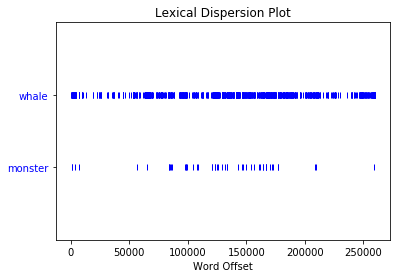

In [8]:
text1.dispersion_plot(["whale", "monster"])

Count a specific word - how many times does this sequence of characters occur in my document?

In [9]:
text1.count("Whale")

282

How many **tokens** are in my text?

**tokens** are unique sequences, let's start with an example:

"love", "bowie", "Bowie", "!" and ":)" are all unique **tokens**

In [10]:
#remove punctuation by only capturing the items that 
#"are alpha" and then lowering those
text1_tokens = []
for t in text1:
    if t.isalpha():
        t=t.lower()
        text1_tokens.append(t)
    else:
        pass

In [11]:
#First figure out how many words are in our text. 

len(text1_tokens)

218361

How many **unique** words are in my text? 

* first make a set that groups all the "words" together (numbers, punctuation sequences, etc.) - this groups together **types**. 
* Token = instance
* Type = more general ("bowie" and "Bowie" are different types - why?)

In [12]:
#set tells us how many unique items - it makes a set
set(text1_tokens)
len(set(text1_tokens))

16948

In [13]:
len(set(text1_tokens))/(len(text1_tokens))

0.07761459234936642

In [14]:
text1_slice = text1_tokens[0:10000]

In [15]:
len(set(text1_slice))/(len(text1_slice))

0.2816

To clean our corpus, we need to:
1. Remove capitalizaton and punctuation (DONE)
2. Remove the stop words
3. Lemmatize the words

In [16]:
#import the stopwords from nltk.corpus
from nltk.corpus import stopwords
stops = stopwords.words('english')

In [17]:
#Remove the stop words
for t in text1_tokens:
    if t in stops:
        text1_tokens.remove(t)
    else:
        pass
        

In [18]:
len(text1_tokens)

144313

In [19]:
len(set(text1_tokens))

16946

In [20]:
# import the lemmatizer function from nltk.stem 
from nltk.stem import WordNetLemmatizer

#the lemmatizer requires that an instance be called before it is used
wordnet_lemmatizer = WordNetLemmatizer()

In [21]:
#Lemmatize the words
text1_clean = [wordnet_lemmatizer.lemmatize(t) for t in text1_tokens]


In [22]:
len(text1_clean)

144313

In [23]:
len(set(text1_clean))

14883

In [24]:
sorted(set(text1_clean))

['a',
 'aback',
 'abaft',
 'abandon',
 'abandoned',
 'abandonedly',
 'abandonment',
 'abased',
 'abasement',
 'abashed',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abbreviate',
 'abbreviation',
 'abeam',
 'abed',
 'abednego',
 'abel',
 'abhorred',
 'abhorrence',
 'abhorrent',
 'abhorring',
 'abide',
 'abided',
 'abiding',
 'ability',
 'abjectly',
 'abjectus',
 'able',
 'ablution',
 'aboard',
 'abode',
 'abominable',
 'abominate',
 'abominated',
 'abomination',
 'aboriginal',
 'aboriginally',
 'aboriginalness',
 'abortion',
 'abound',
 'abounded',
 'abounding',
 'aboundingly',
 'about',
 'above',
 'abraham',
 'abreast',
 'abridged',
 'abroad',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'absorbing',
 'absorbingly',
 'abstained',
 'abstemious',
 'abstinence',
 'abstract',
 'abstracted',
 'abstraction',
 'absurd',
 'absurdly',
 'abundance',
 'abundant',
 'abundantly',
 'academy',
 'accelerate',
 'accelerated',
 'accelerating',
 'accept',
 'accessibl

In [25]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()
t1_porter = [porter_stemmer.stem(t) for t in text1_tokens]
sorted(set(t1_porter))

['a',
 'aback',
 'abaft',
 'abandon',
 'abandonedli',
 'abas',
 'abash',
 'abat',
 'abbrevi',
 'abe',
 'abeam',
 'abednego',
 'abel',
 'abhor',
 'abhorr',
 'abid',
 'abil',
 'abjectli',
 'abjectu',
 'abl',
 'ablut',
 'aboard',
 'abod',
 'abomin',
 'aborigin',
 'abort',
 'abound',
 'aboundingli',
 'about',
 'abov',
 'abraham',
 'abreast',
 'abridg',
 'abroad',
 'abruptli',
 'absenc',
 'absent',
 'absolut',
 'absorb',
 'absorbingli',
 'abstain',
 'abstemi',
 'abstin',
 'abstract',
 'absurd',
 'absurdli',
 'abund',
 'abundantli',
 'academi',
 'acceler',
 'accept',
 'access',
 'accessori',
 'accid',
 'accident',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'accordingli',
 'accost',
 'account',
 'accumul',
 'accur',
 'accuraci',
 'accurs',
 'accustom',
 'acerb',
 'ach',
 'achiev',
 'achil',
 'acknowledg',
 'acquaint',
 'acquiesc',
 'acquir',
 'acr',
 'acrid',
 'across',
 'act',
 'actest',
 'action',
 'actium',
 'activ',
 'actual',
 'actuat',
 'acushnet',
 'acut',
 'ad',
 'adam',
 '

In [26]:
my_dist = FreqDist(text1_clean)

Usually nothing happens here, so check the **type** to be sure it worked

In [27]:
type(my_dist)

nltk.probability.FreqDist

Now let's **plot** the graph

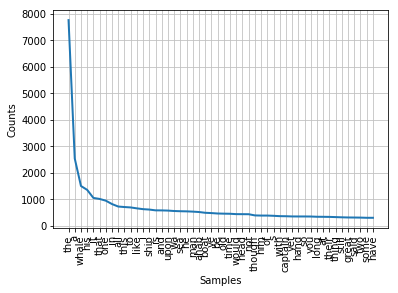

In [28]:
my_dist.plot(50,cumulative=False)

It may be a little easier to look at as a list

In [29]:
my_dist.most_common(20)

[('the', 7757),
 ('a', 2531),
 ('whale', 1494),
 ('his', 1348),
 ('it', 1044),
 ('that', 1006),
 ('one', 940),
 ('in', 812),
 ('all', 719),
 ('this', 700),
 ('to', 685),
 ('like', 650),
 ('i', 620),
 ('ship', 605),
 ('is', 575),
 ('and', 573),
 ('upon', 566),
 ('wa', 550),
 ('sea', 542),
 ('he', 537)]

Now let's check to see if some words we are interested in appear in our text

In [30]:
b_words = ['god', 'apostle', 'angel']

In [31]:
my_list = []
for word in b_words:
    if word in text1_clean:
        my_list.append(word)
    else:
        pass

In [32]:
print(my_list)

['god', 'angel']


Let's pull a book in from the Internet

Project Gutenburg is a great source! www.gutenberg.org
Let's say I'm interested in the narratives of formerly enslaved people recorded through The Works Progress Administration. I find the book, *SLAVE NARRATIVES: A Folk History of Slavery in the United States From Interviews with Former Slaves, Part 3*. In Project Gutenberg's database, this is text number 36022-0.  



To make a book into a Text NLTK can deal with, we have to:

* open the file from a location
* read it/decode it 
* tokenize it (go from a string to a list of word)
* nltk.Text() 

In [33]:
#import the urlopen command
from urllib.request import urlopen
#set the url to a variable 
#DO NOT NAVIGATE TO THE SITE AND JUST COPY THE LINK - THIS IS THE TXT VERSION! BETTER TO TYPE THIS LINK
my_url = "https://www.gutenberg.org/files/36022/36022-0.txt"


In [34]:
#open the file from the url
file = urlopen(my_url)
#read the opened file
raw = file.read()

In [35]:
narratives=raw.decode()

In [36]:
#check the type to be sure it worked. I expect a string now.
type(narratives)

str

In [37]:
import nltk

In [38]:
#split the string into words with word_tokenize (uses spaces to distinguish words)
narr_tokens = nltk.word_tokenize(narratives)

In [39]:
#check to make sure it worked
type(narr_tokens)

list

In [40]:
#get an idea of how big the file is
len(narr_tokens)

100007

In [41]:
#look at the first 10 words to be sure its correct
narr_tokens[:10]

['\ufeff',
 'Slave',
 'Narratives',
 'Volume',
 'XIV',
 ',',
 'South',
 'Carolina',
 'Narratives',
 ',']

In [42]:
#remove the Gutenberg header and the list of interviewee names
narr_text = narr_tokens[505:]
print(narr_text[5:150])

['Winnsboro', ',', 'S.C._', "''", 'I', 'was', 'born', 'four', 'miles', 'southwest', 'of', 'where', 'I', 'is', 'now', ',', 'on', 'de', 'other', 'side', 'of', 'Woodward', 'Station', '.', 'I', 'was', 'a', 'slave', 'of', 'old', 'Marster', 'John', 'Mobley', ',', 'de', 'richest', 'man', ',', 'de', 'larges', '’', 'land', 'owner', ',', 'and', 'wid', 'more', 'niggers', 'than', 'any', 'other', 'white', 'man', 'in', 'de', 'county', '.', 'He', 'was', 'de', 'seventh', 'son', 'of', 'de', 'seventh', 'son', ',', 'so', 'he', 'allowed', ',', 'and', 'you', 'knows', 'dat', '’', 's', 'a', 'sign', 'of', 'a', 'big', 'family', ',', 'lots', 'of', 'cows', ',', 'mules', ',', 'horses', ',', 'money', ',', 'chillun', 'and', 'everything', 'dat', '’', 's', 'worth', 'havin', '’', '.', 'He', 'had', 'a', 'good', 'wife', 'too', ';', 'dis', 'de', 'way', 'he', 'got', 'her', ',', 'he', 'say', '.', 'She', 'de', 'daughter', 'of', 'old', 'Maj.', 'Andy', 'McLean', ',', 'who', 'got', 'a', 'body', 'full', 'of', 'bullets', 'in', '

In [43]:
#turn the list of words into a text nltk can recognize
narr_nltk_text = nltk.Text(narr_tokens[505:])

In [44]:
#Remove stop words
mystops = stopwords.words('english')
narr_clean = [w for w in narr_text if w not in mystops]
#Lowercase and remove punctuation
narr_clean = [t.lower() for t in narr_clean if t.isalpha()]

In [45]:
#Lemmatize
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
narr_clean = [wordnet_lemmatizer.lemmatize(t) for t in narr_clean]

In [46]:
narr_clean

['dixon',
 'winnsboro',
 'i',
 'born',
 'four',
 'mile',
 'southwest',
 'i',
 'de',
 'side',
 'woodward',
 'station',
 'i',
 'slave',
 'old',
 'marster',
 'john',
 'mobley',
 'de',
 'richest',
 'man',
 'de',
 'large',
 'land',
 'owner',
 'wid',
 'nigger',
 'white',
 'man',
 'de',
 'county',
 'he',
 'de',
 'seventh',
 'son',
 'de',
 'seventh',
 'son',
 'allowed',
 'know',
 'dat',
 'sign',
 'big',
 'family',
 'lot',
 'cow',
 'mule',
 'horse',
 'money',
 'chillun',
 'everything',
 'dat',
 'worth',
 'havin',
 'he',
 'good',
 'wife',
 'dis',
 'de',
 'way',
 'got',
 'say',
 'she',
 'de',
 'daughter',
 'old',
 'andy',
 'mclean',
 'got',
 'body',
 'full',
 'bullet',
 'de',
 'revolution',
 'want',
 'katie',
 'marry',
 'marster',
 'john',
 'marster',
 'john',
 'git',
 'mule',
 'ride',
 'de',
 'night',
 'miss',
 'katie',
 'runned',
 'jump',
 'behin',
 'run',
 'away',
 'marry',
 'marster',
 'john',
 'they',
 'de',
 'birthday',
 'march',
 'marster',
 'john',
 'two',
 'year',
 'older',
 'miss',
 'ka

One step further! 
**Part-of-Speech Tagging**

NLTK uses the Penn Tag Set. 

There are other options as well that you many want to look at (i.e., tree tagger and polyglot).

In [47]:
#make a new object that has all the words and tags in it
narr_tagged = nltk.pos_tag(narr_clean)

In [48]:
print(narr_tagged[:10])

[('dixon', 'NN'), ('winnsboro', 'NN'), ('i', 'VBP'), ('born', 'VBN'), ('four', 'CD'), ('mile', 'JJ'), ('southwest', 'NN'), ('i', 'NN'), ('de', 'FW'), ('side', 'FW')]


We have a **list of tuples**


I'm going to put it in a for-loop

Have to deal with this in a special way 
<br>(a, b) in my_list


In [49]:
#create an empty dictionary
tag_dict = {}
#for every word/tag combo in my list, 
for (word, tag) in narr_tagged:
    if tag in tag_dict: 
        tag_dict[tag]+=1
    else:
        tag_dict[tag] = 1


In [94]:
tag_dict

{'NN': 20755,
 'VBP': 3024,
 'VBN': 1179,
 'CD': 648,
 'JJ': 8491,
 'FW': 2896,
 'IN': 2855,
 'PRP': 1016,
 'VBZ': 403,
 'VBD': 2847,
 'NNS': 1069,
 'VB': 1461,
 'RB': 2509,
 'JJR': 151,
 'DT': 458,
 'PRP$': 366,
 'MD': 518,
 'JJS': 97,
 'WRB': 206,
 'RP': 59,
 'UH': 29,
 'VBG': 632,
 'CC': 118,
 'WP': 58,
 'NNP': 57,
 'RBS': 9,
 'RBR': 58,
 'TO': 19,
 'EX': 13,
 'WDT': 11,
 'PDT': 2,
 'WP$': 4}

In [50]:
from collections import OrderedDict
tag_dict = OrderedDict(sorted(tag_dict.items(), key=lambda t: t[1], reverse=True))
tag_dict

OrderedDict([('NN', 20755),
             ('JJ', 8491),
             ('VBP', 3024),
             ('FW', 2896),
             ('IN', 2855),
             ('VBD', 2847),
             ('RB', 2509),
             ('VB', 1461),
             ('VBN', 1179),
             ('NNS', 1069),
             ('PRP', 1016),
             ('CD', 648),
             ('VBG', 632),
             ('MD', 518),
             ('DT', 458),
             ('VBZ', 403),
             ('PRP$', 366),
             ('WRB', 206),
             ('JJR', 151),
             ('CC', 118),
             ('JJS', 97),
             ('RP', 59),
             ('WP', 58),
             ('RBR', 58),
             ('NNP', 57),
             ('UH', 29),
             ('TO', 19),
             ('EX', 13),
             ('WDT', 11),
             ('RBS', 9),
             ('WP$', 4),
             ('PDT', 2)])

How do you know to put all that other stuff in (i.e., sorted, lambda, etc)?!?

*Read the docs*

https://docs.python.org/3.1/whatsnew/3.1.html

So far, we have counted things in our texts by looking at 

* Concordance
* Words in similar environments
* Words in common contexts
* Unique words 
* Length of words 


Then we performed some operations, but still counted things:

* Frequency Distributions
* Lexical Density 
* Found words from a list in a text
* Part-of-Speech Tags

Now we will perform operations on the Text itself before doing those operations

In [51]:
#Let's check out the lexical density
len(set(narr_clean))/len(narr_clean)

0.10915452343419585

### What if I want to read in my OWN corpus?
Imagine that you are really interested in doing textual analysis using 

In [52]:
fireurl = "catchingfire.txt"
f = open(fireurl, 'r')
my_file = f.read()
f.close()


In [54]:
cf_tokens = nltk.word_tokenize(my_file)
cf_tokens[400:500]

['before',
 'the',
 'cheering',
 'crowds',
 'who',
 'secretly',
 'loathe',
 'me',
 ',',
 'to',
 'look',
 'down',
 'into',
 'the',
 'faces',
 'of',
 'the',
 'families',
 'whose',
 'children',
 'I',
 'have',
 'killed',
 '...',
 'The',
 'sun',
 'persists',
 'in',
 'rising',
 ',',
 'so',
 'I',
 'make',
 'myself',
 'stand',
 '.',
 'All',
 'my',
 'joints',
 'complain',
 'and',
 'my',
 'left',
 'leg',
 'has',
 'been',
 'asleep',
 'for',
 'so',
 'long',
 'that',
 'it',
 'takes',
 'several',
 'minutes',
 'of',
 'pacing',
 'to',
 'bring',
 'the',
 'feeling',
 'back',
 'into',
 'it',
 '.',
 'I',
 "'ve",
 'been',
 'in',
 'the',
 'woods',
 'three',
 'hours',
 ',',
 'but',
 'as',
 'I',
 "'ve",
 'made',
 'no',
 'real',
 'attempt',
 'at',
 'hunting',
 ',',
 'I',
 'have',
 'nothing',
 'to',
 'show',
 'for',
 'it',
 '.',
 'It',
 'does',
 "n't",
 'matter',
 'for',
 'my',
 'mother']

In [55]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [56]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [58]:
sent = preprocess(my_file)
sent[500:550]

[('and', 'CC'),
 ('little', 'JJ'),
 ('sister', 'NN'),
 (',', ','),
 ('Prim', 'NNP'),
 (',', ','),
 ('anymore', 'RB'),
 ('.', '.'),
 ('They', 'PRP'),
 ('can', 'MD'),
 ('afford', 'VB'),
 ('to', 'TO'),
 ('buy', 'VB'),
 ('butcher', 'RB'),
 ('meat', 'NN'),
 ('in', 'IN'),
 ('town', 'NN'),
 (',', ','),
 ('although', 'IN'),
 ('none', 'NN'),
 ('of', 'IN'),
 ('us', 'PRP'),
 ('likes', 'VBZ'),
 ('it', 'PRP'),
 ('any', 'DT'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('fresh', 'JJ'),
 ('game', 'NN'),
 ('.', '.'),
 ('But', 'CC'),
 ('my', 'PRP$'),
 ('best', 'JJS'),
 ('friend', 'NN'),
 (',', ','),
 ('Gale', 'NNP'),
 ('Hawthorne', 'NNP'),
 (',', ','),
 ('and', 'CC'),
 ('his', 'PRP$'),
 ('family', 'NN'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('depending', 'VBG'),
 ('on', 'IN'),
 ('today', 'NN'),
 ("'s", 'POS'),
 ('haul', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP')]

In [59]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [60]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
#print(cs)

In [61]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged[500:550])

[('and', 'CC', 'O'),
 ('little', 'JJ', 'B-NP'),
 ('sister', 'NN', 'I-NP'),
 (',', ',', 'O'),
 ('Prim', 'NNP', 'O'),
 (',', ',', 'O'),
 ('anymore', 'RB', 'O'),
 ('.', '.', 'O'),
 ('They', 'PRP', 'O'),
 ('can', 'MD', 'O'),
 ('afford', 'VB', 'O'),
 ('to', 'TO', 'O'),
 ('buy', 'VB', 'O'),
 ('butcher', 'RB', 'O'),
 ('meat', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('town', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('although', 'IN', 'O'),
 ('none', 'NN', 'B-NP'),
 ('of', 'IN', 'O'),
 ('us', 'PRP', 'O'),
 ('likes', 'VBZ', 'O'),
 ('it', 'PRP', 'O'),
 ('any', 'DT', 'O'),
 ('better', 'JJR', 'O'),
 ('than', 'IN', 'O'),
 ('fresh', 'JJ', 'B-NP'),
 ('game', 'NN', 'I-NP'),
 ('.', '.', 'O'),
 ('But', 'CC', 'O'),
 ('my', 'PRP$', 'O'),
 ('best', 'JJS', 'O'),
 ('friend', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('Gale', 'NNP', 'O'),
 ('Hawthorne', 'NNP', 'O'),
 (',', ',', 'O'),
 ('and', 'CC', 'O'),
 ('his', 'PRP$', 'O'),
 ('family', 'NN', 'B-NP'),
 ('will', 'MD', 'O'),
 ('be', 'VB', 'O'),
 ('depending', 'VBG', 'O'),
 ('on'

In [62]:
ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(my_file)))
print(ne_tree[500:550])

[(',', ','), ('anymore', 'RB'), ('.', '.'), ('They', 'PRP'), ('can', 'MD'), ('afford', 'VB'), ('to', 'TO'), ('buy', 'VB'), ('butcher', 'RB'), ('meat', 'NN'), ('in', 'IN'), ('town', 'NN'), (',', ','), ('although', 'IN'), ('none', 'NN'), ('of', 'IN'), ('us', 'PRP'), ('likes', 'VBZ'), ('it', 'PRP'), ('any', 'DT'), ('better', 'JJR'), ('than', 'IN'), ('fresh', 'JJ'), ('game', 'NN'), ('.', '.'), ('But', 'CC'), ('my', 'PRP$'), ('best', 'JJS'), ('friend', 'NN'), (',', ','), Tree('PERSON', [('Gale', 'NNP'), ('Hawthorne', 'NNP')]), (',', ','), ('and', 'CC'), ('his', 'PRP$'), ('family', 'NN'), ('will', 'MD'), ('be', 'VB'), ('depending', 'VBG'), ('on', 'IN'), ('today', 'NN'), ("'s", 'POS'), ('haul', 'NN'), ('and', 'CC'), ('I', 'PRP'), ('ca', 'MD'), ("n't", 'RB'), ('let', 'VB'), ('them', 'PRP'), ('down', 'RP'), ('.', '.')]


## Reflection
In the previous example, 

**Challenges for those who want to do more**

* Use a text editor to write complete programs
    * Run these in the terminal
* Use Spyder to write complete programs
* Often save the program you write in the same file as the file you will be working with to shorted the path.

How do I know where to go?!?
* http://www.nltk.org/book_1ed
* http://www.nltk.org/

